In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
%matplotlib inline

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
df = pd.read_csv('서울특별시_부동산_실거래가_정보_2021년.csv', encoding="ms949")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.


,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11110-2021-4-0005751-1,1111018300103450062,11110,종로구,1111018300,평창동,2021,4,신고,1,77.98,90.30,0,1.0,2002,연립주택,560000000,1994.0,(345-62)
1,11110-2021-4-0005458-1,1111017400107030000,11110,종로구,1111017400,창신동,2021,4,신고,1,0.00,54.70,0,6.0,2001,아파트,700000000,1993.0,창신쌍용2
2,11110-2021-4-0007134-1,1111017500113920001,11110,종로구,1111017500,숭인동,2021,4,신고,1,28.98,17.88,0,5.0,14202,오피스텔,112000000,2013.0,종로 아인스빌
3,11440-2021-4-0011347-1,1144011100104620000,11440,마포구,1144011100,신수동,2021,4,신고,1,0.00,84.93,0,16.0,2001,아파트,1950000000,2019.0,신촌숲아이파크
4,11440-2021-4-0011830-1,1144012300103970003,11440,마포구,1144012300,망원동,2021,4,신고,1,33.19,60.06,0,3.0,2002,연립주택,380000000,2008.0,래디앙1차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131866,11740-2021-4-0012341-1,1174010900,11740,강동구,1174010900,천호동,2021,4,신고,1,99.00,159.48,0,NaN,1001,단독주택,735000000,1991.0,NaN
131867,11740-2021-4-0013791-1,1174011000106760001,11740,강동구,1174011000,강일동,2021,4,신고,1,75.21,59.51,0,6.0,14202,오피스텔,600000000,2019.0,강일 테라우드
131868,11740-2021-4-0011476-1,1174010300105130000,11740,강동구,1174010300,상일동,2021,4,신고,1,0.00,59.99,0,22.0,2001,아파트,1450000000,2019.0,고덕센트럴IPARK
131869,11740-2021-4-0013914-1,1174010600100710000,11740,강동구,1174010600,둔촌동,2021,4,신고,1,14.20,20.25,0,1.0,2002,연립주택,156000000,1992.0,부전빌라


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131871 entries, 0 to 131870
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   실거래가아이디  131871 non-null  object 
 1   지번코드     131871 non-null  object 
 2   시군구코드    131871 non-null  int64  
 3   자치구명     131871 non-null  object 
 4   법정동코드    131871 non-null  int64  
 5   법정동명     131871 non-null  object 
 6   신고년도     131871 non-null  int64  
 7   업무구분코드   131871 non-null  int64  
 8   업무구분     131871 non-null  object 
 9   물건번호     131871 non-null  int64  
 10  대지권면적    131211 non-null  float64
 11  건물면적     131871 non-null  float64
 12  관리구분코드   131871 non-null  object 
 13  층정보      122515 non-null  float64
 14  건물주용도코드  131871 non-null  int64  
 15  건물주용도    131871 non-null  object 
 16  물건금액     131871 non-null  int64  
 17  건축년도     130660 non-null  float64
 18  건물명      122493 non-null  object 
dtypes: float64(4), int64(7), object(8)
memory usage: 19.1+ MB


In [5]:
df.isnull()

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131866,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
131867,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
131868,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
131869,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df = df.fillna('')
df

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11110-2021-4-0005751-1,1111018300103450062,11110,종로구,1111018300,평창동,2021,4,신고,1,77.98,90.30,0,1.0,2002,연립주택,560000000,1994.0,(345-62)
1,11110-2021-4-0005458-1,1111017400107030000,11110,종로구,1111017400,창신동,2021,4,신고,1,0.0,54.70,0,6.0,2001,아파트,700000000,1993.0,창신쌍용2
2,11110-2021-4-0007134-1,1111017500113920001,11110,종로구,1111017500,숭인동,2021,4,신고,1,28.98,17.88,0,5.0,14202,오피스텔,112000000,2013.0,종로 아인스빌
3,11440-2021-4-0011347-1,1144011100104620000,11440,마포구,1144011100,신수동,2021,4,신고,1,0.0,84.93,0,16.0,2001,아파트,1950000000,2019.0,신촌숲아이파크
4,11440-2021-4-0011830-1,1144012300103970003,11440,마포구,1144012300,망원동,2021,4,신고,1,33.19,60.06,0,3.0,2002,연립주택,380000000,2008.0,래디앙1차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131866,11740-2021-4-0012341-1,1174010900,11740,강동구,1174010900,천호동,2021,4,신고,1,99.0,159.48,0,,1001,단독주택,735000000,1991.0,
131867,11740-2021-4-0013791-1,1174011000106760001,11740,강동구,1174011000,강일동,2021,4,신고,1,75.21,59.51,0,6.0,14202,오피스텔,600000000,2019.0,강일 테라우드
131868,11740-2021-4-0011476-1,1174010300105130000,11740,강동구,1174010300,상일동,2021,4,신고,1,0.0,59.99,0,22.0,2001,아파트,1450000000,2019.0,고덕센트럴IPARK
131869,11740-2021-4-0013914-1,1174010600100710000,11740,강동구,1174010600,둔촌동,2021,4,신고,1,14.2,20.25,0,1.0,2002,연립주택,156000000,1992.0,부전빌라


In [7]:
df = df.sort_values(by="물건금액", ascending=False)
df

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
126343,11650-2021-4-0013733-1,1165010800,11650,서초구,1165010800,서초동,2021,4,신고,1,908.6,599.02,0,,1001,단독주택,26000000000,2009.0,
104622,11200-2021-4-0007791-1,1120011500,11200,성동구,1120011500,성수동2가,2021,4,신고,1,545.7,1407.60,0,,1001,단독주택,24750000000,1992.0,
17906,11710-2021-4-0022461-1,1171010200100290000,11710,송파구,1171010200,신천동,2021,4,신고,1,799.71,489.79,0,68.0,14202,오피스텔,24500000000,,롯데월드타워앤드롯데월드몰
121719,11680-2021-4-0010773-1,1168010800,11680,강남구,1168010800,논현동,2021,4,신고,1,460.0,757.62,0,,1001,단독주택,23000000000,1981.0,
16392,11680-2021-4-0011887-1,1168010800,11680,강남구,1168010800,논현동,2021,4,신고,1,656.3,322.92,0,,1001,단독주택,21700000000,1981.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,11260-2021-4-0001522-1,1126010100101390060,11260,중랑구,1126010100,면목동,2021,4,신고,1,10.83,17.86,0,2.0,2002,연립주택,32000000,1984.0,(139-60)
23697,11530-2021-4-0002686-1,1153010200101730006,11530,구로구,1153010200,구로동,2021,4,신고,1,6.5,21.79,0,4.0,2002,연립주택,30000000,1972.0,영서연립
86353,11590-2021-4-0003786-1,1159010200101340195,11590,동작구,1159010200,상도동,2021,4,신고,1,27.55,38.34,0,1.0,2002,연립주택,30000000,1995.0,(134-195)
42389,11470-2021-4-0002632-1,1147010300100880034,11470,양천구,1147010300,신월동,2021,4,신고,1,11.68,21.15,0,-1.0,2002,연립주택,30000000,1997.0,(88-34)


In [8]:
df.drop(columns=['실거래가아이디',	'지번코드', '시군구코드', '법정동코드', '업무구분코드', '물건번호', '관리구분코드', '건물주용도코드'], inplace=True)

In [9]:
df.shape

(131871, 11)

In [10]:
df

,자치구명,법정동명,신고년도,업무구분,대지권면적,건물면적,층정보,건물주용도,물건금액,건축년도,건물명
126343,서초구,서초동,2021,신고,908.6,599.02,,단독주택,26000000000,2009.0,
104622,성동구,성수동2가,2021,신고,545.7,1407.60,,단독주택,24750000000,1992.0,
17906,송파구,신천동,2021,신고,799.71,489.79,68.0,오피스텔,24500000000,,롯데월드타워앤드롯데월드몰
121719,강남구,논현동,2021,신고,460.0,757.62,,단독주택,23000000000,1981.0,
16392,강남구,논현동,2021,신고,656.3,322.92,,단독주택,21700000000,1981.0,
...,...,...,...,...,...,...,...,...,...,...,...
14798,중랑구,면목동,2021,신고,10.83,17.86,2.0,연립주택,32000000,1984.0,(139-60)
23697,구로구,구로동,2021,신고,6.5,21.79,4.0,연립주택,30000000,1972.0,영서연립
86353,동작구,상도동,2021,신고,27.55,38.34,1.0,연립주택,30000000,1995.0,(134-195)
42389,양천구,신월동,2021,신고,11.68,21.15,-1.0,연립주택,30000000,1997.0,(88-34)


In [11]:
df_sum = pd.DataFrame(df['자치구명'].value_counts())

In [12]:
df_normalize = pd.DataFrame(df['자치구명'].value_counts(normalize=True))
df_normalize

,자치구명
강서구,0.085144
은평구,0.066588
송파구,0.060476
도봉구,0.050762
구로구,0.050587
양천구,0.045067
강동구,0.043671
노원구,0.042769
강남구,0.042011
중랑구,0.040888


In [18]:
# 시도별 합계 데이터와 비율 데이터를 병합
real_estate = df_sum.merge(df_normalize, left_index=True, right_index=True).reset_index()
# 병합된 데이터의 열 이름을 변경
real_estate.columns = ['자치구명', '거래수', '거래비율']
real_estate

,자치구명,거래수,거래비율
0,강서구,11228,0.085144
1,은평구,8781,0.066588
2,송파구,7975,0.060476
3,도봉구,6694,0.050762
4,구로구,6671,0.050587
5,양천구,5943,0.045067
6,강동구,5759,0.043671
7,노원구,5640,0.042769
8,강남구,5540,0.042011
9,중랑구,5392,0.040888


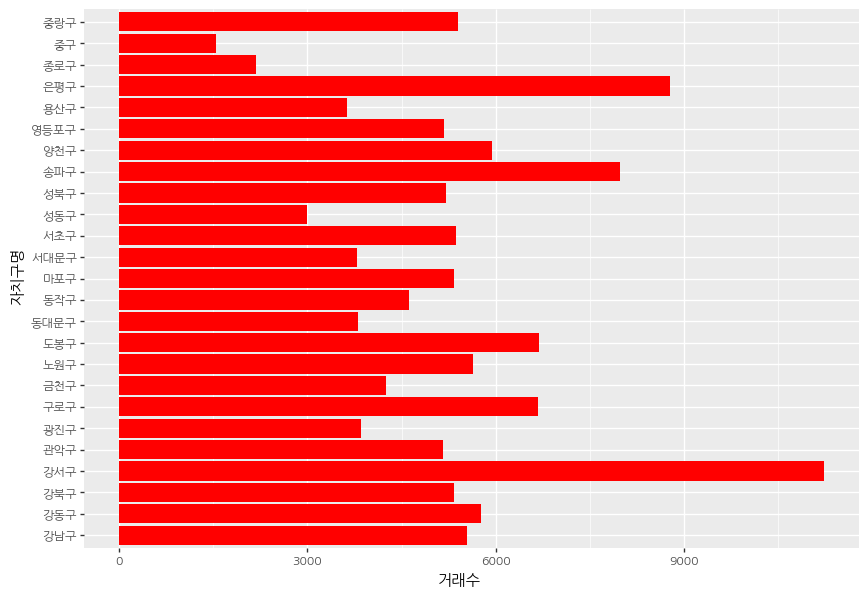

<ggplot: (8755622856873)>

In [19]:
ggplot(real_estate, aes(x='자치구명', y='거래수')) \
    + geom_bar(stat='identity', fill='red') \
    + coord_flip() \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

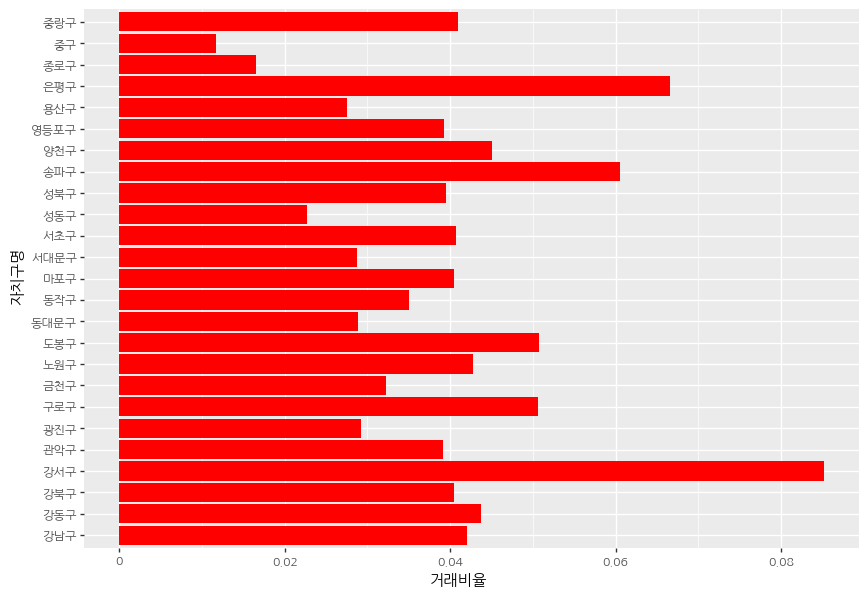

<ggplot: (8755622872465)>

In [20]:
ggplot(real_estate, aes(x='자치구명', y='거래비율')) \
    + geom_bar(stat='identity', fill='red') \
    + coord_flip() \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))